In [0]:
# activate R magic
%load_ext rpy2.ipython

#**Data.table** - Melhorar Performance de Processamento R
## data.table herda data.frame


In [0]:
%%R
# Instalando os pacotes
install.packages("data.table")
library(data.table)
# r-datatable.com

In [0]:
%%R
# Criando 2 vetores
vec1 <- c(1, 2, 3, 4)
vec2 <- c('Vermelho', 'Verde', 'Marrom', 'Laranja')

In [4]:
%%R
vec1

[1] 1 2 3 4


In [5]:
%%R
vec2

[1] "Vermelho" "Verde"    "Marrom"   "Laranja" 


In [7]:
%%R
dt1 <- data.table(vec1, vec2)
dt1

   vec1     vec2
1:    1 Vermelho
2:    2    Verde
3:    3   Marrom
4:    4  Laranja


In [9]:
%%R
class(dt1)

[1] "data.table" "data.frame"


---

#**Slicing**

In [11]:
%%R
# Slicing do data.table
dt2 <- data.table(A = 1:9, 
                  B = c("Z", "W", "Q"), #replica 3 vezes
                  C = rnorm(9), 
                  D = TRUE) #replica 9 vezes
dt2

   A B           C    D
1: 1 Z  0.83773081 TRUE
2: 2 W -0.97453172 TRUE
3: 3 Q  0.50585811 TRUE
4: 4 Z -0.21557670 TRUE
5: 5 W -0.02604121 TRUE
6: 6 Q -0.35083621 TRUE
7: 7 Z -0.09027873 TRUE
8: 8 W -0.35001220 TRUE
9: 9 Q  0.03879616 TRUE


In [13]:
%%R
class(dt2)

[1] "data.table" "data.frame"


In [14]:
%%R
dt2[1,1] # A x 1

   A
1: 1


In [15]:
%%R
dt2[3:5,] # linha 3, 4 e 5 e todas as colunas

   A B           C    D
1: 3 Q  0.50585811 TRUE
2: 4 Z -0.21557670 TRUE
3: 5 W -0.02604121 TRUE


In [16]:
%%R
dt2[, .(B, C)] # todas as linhas, coluna b e c

   B           C
1: Z  0.83773081
2: W -0.97453172
3: Q  0.50585811
4: Z -0.21557670
5: W -0.02604121
6: Q -0.35083621
7: Z -0.09027873
8: W -0.35001220
9: Q  0.03879616


In [21]:
%%R
# Aplicando função ao data.table
dt2[, .(Total = sum(A), Média = mean(C))] #coluna será somatório de A com nome "Total", coluna será média de C, nome "Mean"

   Total       Média
1:    45 -0.06943241


NULL


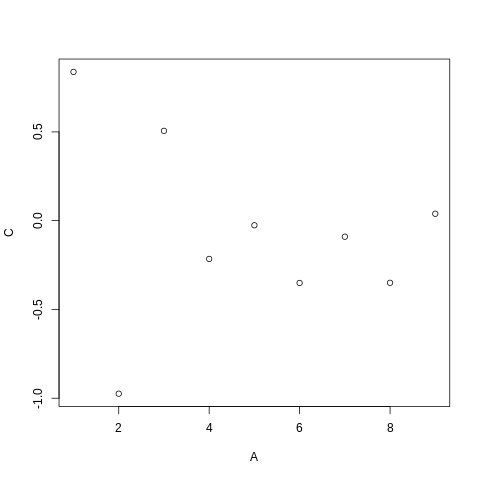

In [18]:
%%R
dt2[, plot(A, C)]

In [20]:
%%R
dt2[, .(MySum = sum(A)), by = .(Grp = A%%2)]

   Grp MySum
1:   1    25
2:   0    20


In [23]:
%%R
# Definindo valores por grupos
dt3 <- data.table(B = c("a", "b", "c", "d", "e", "a", "b", "c", "d", "e"), 
                  val = as.integer(c(6:10, 1:5)))
dt3

    B val
 1: a   6
 2: b   7
 3: c   8
 4: d   9
 5: e  10
 6: a   1
 7: b   2
 8: c   3
 9: d   4
10: e   5


In [24]:
%%R
# Operações com data.tables
dt4 <- data.table(A = rep(letters[2:1], each = 4L), 
                  B = rep(1:4, each = 2L), 
                  C = sample(8))

dt4

   A B C
1: b 1 2
2: b 1 5
3: b 2 4
4: b 2 8
5: a 3 6
6: a 3 3
7: a 4 7
8: a 4 1


In [0]:
%%R
new_dt4 <- dt4[, sum(C), by = A] #retonar a soma da coluna C, agrupado pelos valores da coluna A

In [27]:
%%R
new_dt4

   A V1
1: b 19
2: a 17


In [28]:
%%R
class(new_dt4)

[1] "data.table" "data.frame"


In [29]:
%%R
new_dt4[order(A)]

   A V1
1: a 17
2: b 19


In [0]:
%%R
new_dt4 <- dt4[, sum(B), by = A][order(A)] #somar a coluna B e ordernar pelos valores da coluna a 

In [31]:
%%R 
new_dt4

   A V1
1: a 14
2: b  6


#**Com apenas uma instrução, resolver vários PROBLEMAS.**

In [32]:
%%R
# Iris
dt5 <- as.data.table(iris)
dt5
dt5[, .(Sepal.Length = median(Sepal.Length),
         Sepal.Width = median(Sepal.Width),
         Petal.Length = median(Petal.Length),
         Petal.Width = median(Petal.Width)),
     by = Species]

      Species Sepal.Length Sepal.Width Petal.Length Petal.Width
1:     setosa          5.0         3.4         1.50         0.2
2: versicolor          5.9         2.8         4.35         1.3
3:  virginica          6.5         3.0         5.55         2.0


## O parâmetro .SD significa Subset Data e um subset é criado considerando a coluna Species e depois calculda a mediana.
## O resultado deve ser igual ao comando anterior. 
## O .SD faz parte da notação do pacote data.table.



In [33]:
%%R
dt5[, lapply(.SD, median), by = Species]

      Species Sepal.Length Sepal.Width Petal.Length Petal.Width
1:     setosa          5.0         3.4         1.50         0.2
2: versicolor          5.9         2.8         4.35         1.3
3:  virginica          6.5         3.0         5.55         2.0
